In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits

data_culpan = pd.read_csv('/home/fmq/MESA/work/my/observe_data/culpan2022/knownhsd.dat', header=None, sep='\t')

    # 将字符串转换为浮点数的辅助函数
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return -10**3
log_Teff = []
log_Teff_err = []
log_g = []
log_g_err = []
log_he = []
log_he_err = []
# 处理每一行的辅助函数
def process_row(row):
    star_name = row[0][0:27].replace(" ", "").replace('[?/]', '')
    Teff = convert_to_float(row[0][305:311])
    Teff_err = convert_to_float(row[0][312:317])
    logg = convert_to_float(row[0][318:322])
    logg_err = convert_to_float(row[0][323:327])
    loghe = convert_to_float(row[0][328:333])
    loghe_err = convert_to_float(row[0][334:339])

    # 如果有无效数据，则返回 None
    if Teff == -10**3 or logg == -10**3 or loghe == -10**3:
        return None

    # 处理缺失的错误值
    if Teff_err == -10**3:
        Teff_err = 0.02
    if logg_err == -10**3:
        logg_err = 0.1
    if loghe_err == -10**3:
        loghe_err = 0.1
    log_Teff.append(np.log10(Teff))
    log_Teff_err.append(np.log10(1 + Teff_err / Teff))
    log_g.append(logg)
    log_g_err.append(logg_err)
    log_he.append(loghe)
    log_he_err.append(loghe_err)
    return {
            'star_name': star_name,
            'log_Teff': np.log10(Teff),
            'log_Teff_err': np.log10(1 + Teff_err / Teff),
            'log_g': logg,
            'log_g_err': logg_err,
            'log_he': loghe,
            'log_he_err': loghe_err
        }

    # 使用 apply 函数处理每一行，并丢弃包含无效数据的行，最后转换为列表
data_culpan_list = data_culpan.apply(process_row, axis=1).dropna().tolist()

In [2]:
import numpy as np
print("log_Teff_err mean:", np.mean(log_Teff_err))
print("log_g_err mean:", np.mean(log_g_err))
print("log_he_err mean:", np.mean(log_he_err))

log_Teff_err mean: 0.010403429135547237
log_g_err mean: 0.12120514556533517
log_he_err mean: 0.1766079891672309


In [4]:
import numpy as np


# 找出每个数组的最小和最大值
log_Teff_range = np.min(log_Teff), np.max(log_Teff)
log_g_range = np.min(log_g), np.max(log_g)
log_he_range = np.min(log_he), np.max(log_he)

print("log_Teff range:", log_Teff_range)
print("log_g range:", log_g_range)
print("log_he range:", log_he_range)

log_Teff range: (4.230474467361159, 5.301029995663981)
log_g range: (3.09, 6.94)
log_he range: (-5.0, 3.0)


In [1]:
import pandas as pd
method_data = pd.read_csv('/home/fmq/MESA/work/my/MCMC/code/lei/iso_grid.csv')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


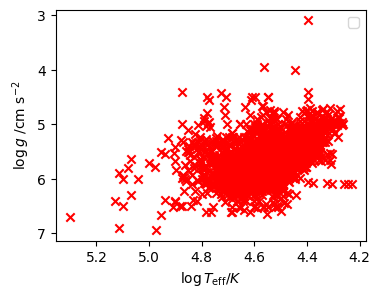

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()

# change_indices_all = np.where((method_data["mass"].iloc[:-1].values != method_data["mass"].iloc[1:].values) | (method_data["he"].iloc[:-1].values != method_data["he"].iloc[1:].values))[0] for star_index, observed_data_star in enumerate(data_culpan_list):
#     ax.scatter(observed_data_star['log_Teff'],observed_data_star['log_g'],marker='x',color='r')
# method_data_siginl = np.split(method_data, change_indices_all + 1)

# for data in method_data_siginl:
#     if not data.empty:
#         ax.plot(data['log_Teff'], data['log_g'], color='gray')


ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
for star_index, observed_data_star in enumerate(data_culpan_list):
    ax.scatter(observed_data_star['log_Teff'],observed_data_star['log_g'],marker='x',color='r')

# data_lei = fits.open('/home/fmq/MESA/work/my/observe_data/lei2023/sd_mass_0p20.fits')
# num_rows = data_lei[1].data.shape[0]
# print(f"The number of rows is {num_rows}")
# Teff=data_lei[1].data['teff']
# logg=data_lei[1].data['logg']
# loghe=data_lei[1].data['loghe']
# he_class = data_lei[1].data['sp_class']
# mass = data_lei[1].data['mass_median']
# L=data_lei[1].data['l_div_lsun_median']

# log_Teff = np.log10(Teff)
# log_L = np.log10(L)
# ax = plt.gca()
# # 创建一个字典来映射 he_class 的值到颜色和标记
# class_to_marker = {
#     'sdB': ('k', 'o'),  # 黑色圆圈
#     'sdO': ('g', 's'),  # 绿色正方形
#     'sdOB': ('m', '^'),  # 紫色正三角形
#     'He-sdB': ('pink', '*'),  # 粉红色五角星
#     'He-sdO': ('b', '<'),  # 蓝色左三角
#     'He-sdOB': ('r', 'D')  # 红色菱形
# }

# # 绘制散点图
# for cls, (color, marker) in class_to_marker.items():
#     mask = he_class == cls
#     ax.scatter(log_Teff[mask], logg[mask], color=color, marker=marker, facecolors='none', label=cls)

# 添加图例
ax.legend()
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$ /cm s$^{-2}$')
plt.savefig('culpan&lei.png', dpi=200)
plt.show()